In [ ]:
import pandas as pd
import glob
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from six import StringIO  


df = pd.concat([pd.read_csv(f, sep=',', na_values=".", header=None) for f in glob.glob('watch/gyro/*.txt')], ignore_index=True)

Bf = df[[1,3,4,5]][df[1] == 'B']
Ff = df[[1,3,4,5]][df[1] == 'F']
Sf = df[[1,3,4,5]][df[1] == 'S']

ds0 = Bf.append(Ff, ignore_index=True)
dsf = ds0.append(Sf, ignore_index=True)

X = dsf[[3,4,5]]
Y = dsf[[1]]
y = np.ravel(Y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf=RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [4]:
import pandas as pd
import glob
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from six import StringIO  

df = pd.concat([pd.read_csv(f, sep=',', na_values=".", header=None) for f in glob.glob('watch/gyro/*.txt')], ignore_index=True)

Bf = df[[1,3,4,5]][df[1] == 'B']
Ff = df[[1,3,4,5]][df[1] == 'F']
Sf = df[[1,3,4,5]][df[1] == 'S']

ds0 = Bf.append(Ff, ignore_index=True)
dsf = ds0.append(Sf, ignore_index=True)

X = dsf[[3,4,5]]
Y = dsf[[1]]
y = np.ravel(Y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

feature_imp = pd.Series(clf.feature_importances_,index=['X','Y','Z']).sort_values(ascending=False)
feature_imp

Accuracy: 0.7443900046383426


Y    0.370465
Z    0.342974
X    0.286561
dtype: float64

No handles with labels found to put in legend.


Accuracy: 0.7452536960126248


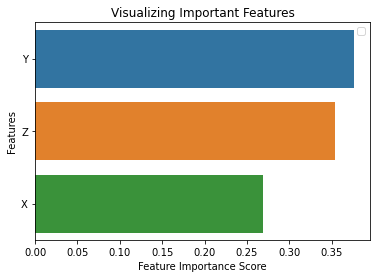

In [13]:
import pandas as pd
import glob
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from six import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.concat([pd.read_csv(f, sep=',', na_values=".", header=None) for f in glob.glob('watch/gyro/*.txt')], ignore_index=True)

Bf = df[[1,3,4,5]][df[1] == 'B']
Ff = df[[1,3,4,5]][df[1] == 'F']
Sf = df[[1,3,4,5]][df[1] == 'S']

ds0 = Bf.append(Ff, ignore_index=True)
dsf = ds0.append(Sf, ignore_index=True)

X = dsf[[3,4,5]]
Y = dsf[[1]]
y = np.ravel(Y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

feature_imp = pd.Series(clf.feature_importances_,index=['X','Y','Z']).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()